# Тема “Обучение с учителем”

### Задание 1

Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [4]:
y = pd.DataFrame(boston.target, columns=["price"])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)

In [10]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [11]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.711226005748496

### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [13]:
clf = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [14]:
clf.fit(X_train, y_train.values[:,0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
r2_score(y_test, y_pred)

0.87472606157312

Для данной выборки использование модели "RandomForestRegressor" более предпочтительно - метрика выше!

### Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [17]:
clf.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [18]:
sum(clf.feature_importances_)

1.0

In [19]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

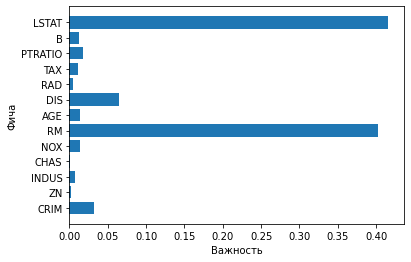

In [20]:
feature_names = boston["feature_names"]
plt.barh(feature_names, clf.feature_importances_)

plt.xlabel("Важность")
plt.ylabel("Фича")

plt.show()

Два наиболее важных признака - LSTAT и RM

### Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df.


In [41]:
df = pd.read_csv("creditcard.csv")

С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков

In [42]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.


In [39]:
pd.options.display.max_columns = 100

In [40]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Создайте датафрейм X из датафрейма df, исключив столбец Class.

Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.

У вас должны получиться объекты X_train, X_test, y_train и y_test.

Просмотрите информацию о их форме.


In [46]:
X = df.copy()

In [49]:
X.drop(columns='Class', inplace=True)

In [51]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [52]:
y = pd.Series(df['Class'].values)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Для поиска по сетке параметров задайте такие параметры:

parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:

estimator=RandomForestClassifier(random_state=100),

param_grid=parameters,

scoring='roc_auc',

cv=3.


In [62]:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]


In [64]:
from sklearn.ensemble import RandomForestClassifier

clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3,
)

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.
Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.


In [65]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [66]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [67]:
y_pred = clf.predict_proba(X_test)

In [74]:
y_pred_proba = y_pred[:, 1]

In [76]:
from sklearn.metrics import roc_auc_score

In [77]:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156